In [1]:
import numpy as np
from System_backend import *
import matplotlib.pyplot as plt
import ellipse as ell
%matplotlib widget

In [2]:
ell_tot = 100.
distance_anchor = 50.
rho0 = 0.11
temperature = 0.1

(274, 3)
[array([25.,  0.,  0.]), array([0., 0., 5.]), array([0., 5., 0.])]


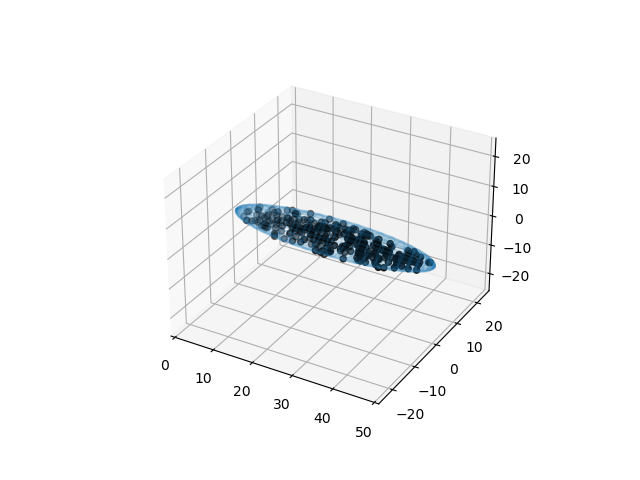

In [7]:
S = System(ell_tot,distance_anchor,rho0,temperature)
r = S.get_r()
print(r.shape)
R = S.get_R()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ell = S.get_ell()
for i in range(0,R.shape[0]-1):
    axes = ell.construct_axes_from_main_axe((R[i+1]-R[i])/2,np.sqrt(Ell[i])/2)
    print(axes)
    xel,yel,zel = ell.ellipse(axes,[0.5*(R[i,0]+R[i+1,0]),0.5*(R[i+1,1]+R[i,1]),(R[i+1,2]+R[i,2])*0.5])
    ax.plot_wireframe(xel, yel, zel,  rstride=4, cstride=4, color='#2980b9', alpha=0.2)

ax.set_xlim(0,50)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

ax.scatter(r[:,0],r[:,1],r[:,2],color='black')

In [4]:
R

array([[ 0.,  0.,  0.],
       [50.,  0.,  0.]])

48297.64107046976
19.8997 8.64108
(56, 3)


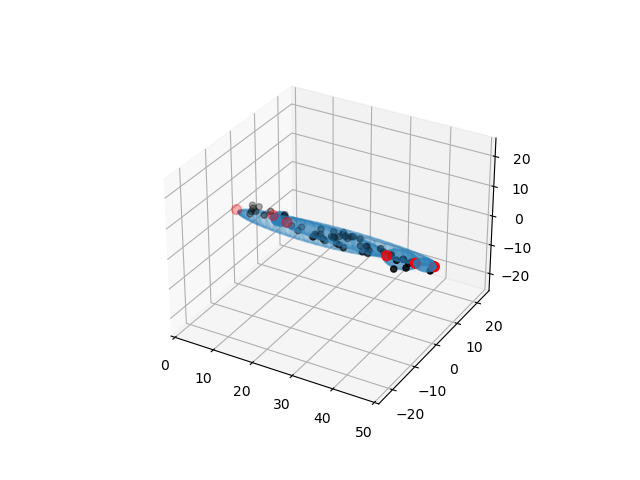

In [15]:
print(S.evolve())
r = S.get_r()
print(r.shape)
R = S.get_R()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ell = S.get_ell()
for i in range(0,R.shape[0]-1):
    axes = ell.construct_axes_from_main_axe((R[i+1]-R[i])/2,np.sqrt(Ell[i])/2)
    xel,yel,zel = ell.ellipse(axes,[0.5*(R[i,0]+R[i+1,0]),0.5*(R[i+1,1]+R[i,1]),(R[i+1,2]+R[i,2])*0.5])
    ax.plot_wireframe(xel, yel, zel,  rstride=4, cstride=4, color='#2980b9', alpha=0.2)

ax.set_xlim(0,50)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

ax.scatter(r[:,0],r[:,1],r[:,2],color='black')
ax.scatter(R[:,0],R[:,1],R[:,2],s=50,color='red')

In [11]:
S.Print_loop_positions()

theta Phi 0 0
xg,yg,zg 25 0 0
volume 2617.99
ell 100
anchoring points. left :0 0 0 right : 50 0 0
number of crosslinkers of this loop :274



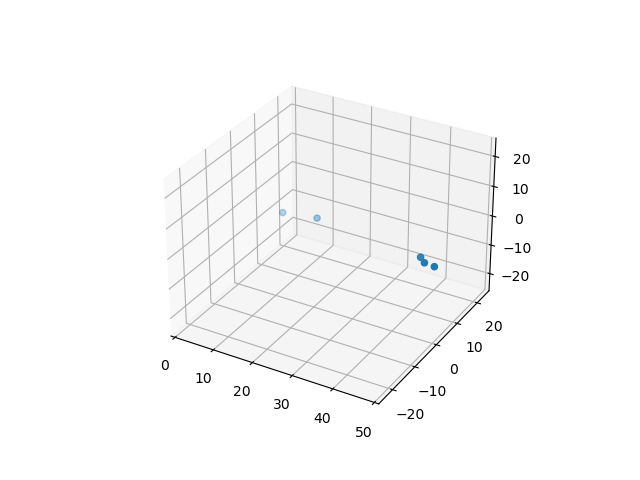

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0,50)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)
ax.scatter(R[:,0],R[:,1],R[:,2])